In [167]:
!nvidia-smi

fish: Unknown command: nvidia-smi
fish: 
nvidia-smi
^~~~~~~~~^


In [168]:
#!unzip /run/media/ray/D/vscode/nlp_end_end_to_project/Data/dataset.zip

In [169]:
import pandas as pd
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ray/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [170]:
df = pd.read_csv(r'/run/media/ray/D/vscode/nlp_end_end_to_project/Data/imbalanced_data.csv')

In [171]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


<Axes: xlabel='label', ylabel='count'>

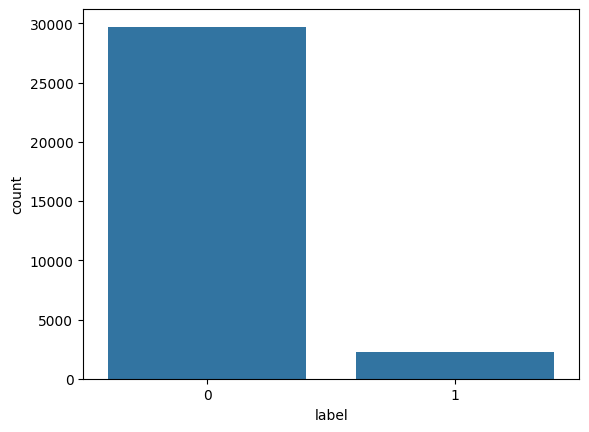

In [172]:

sns.countplot(x='label', data=df)

In [173]:

raw_data = pd.read_csv(r"/run/media/ray/D/vscode/nlp_end_end_to_project/Data/raw_data.csv")
raw_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [174]:

raw_data.isnull().sum()
     


Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [175]:

# Let's drop the columns which are not required for us.
raw_data.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace =True)

In [176]:

raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [177]:

# Let's check for the unique values in the dataset
raw_data['class'].unique()

array([2, 1, 0])

<Axes: xlabel='class', ylabel='count'>

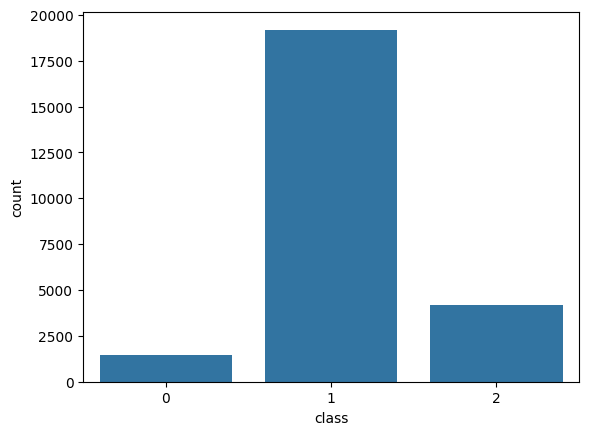

In [178]:
# Plotting the countplot for our new dataset
sns.countplot(x='class',data =raw_data)

In [179]:
#Let's copy the valus of the class 1 into class 0.
raw_data[raw_data['class']==0]['class']=1

/tmp/ipykernel_17793/1750347355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data[raw_data['class']==0]['class']=1


In [180]:
raw_data.head()


,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [181]:

# Let's change the name of the 'class' to label
raw_data.rename(columns={'class':'label'},inplace =True)

In [182]:

# Let's concatinate both the data into a single data frame.
frame = [df, raw_data]
df = pd.concat(frame)

In [183]:

df.head()
   

,id,label,tweet
0,1.0,0,@user when a father is dysfunctional and is s...
1,2.0,0,@user @user thanks for #lyft credit i can't us...
2,3.0,0,bihday your majesty
3,4.0,0,#model i love u take with u all the time in ...
4,5.0,0,factsguide: society now #motivation


In [184]:
##Preprocessing

In [185]:
# Let's apply stemming and stopwords on the data
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

In [186]:

# Let's apply regex and do cleaning.
def data_cleaning(words):
    words = str(words).lower()
    #words = re.sub('?', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(' ') if words not in stopword]
    words=" ".join(words)
    words = [stemmer.stem(words) for word in words.split(' ')]
    words=" ".join(words)

    return words

In [187]:
df["tweet"][1]

1    @user @user thanks for #lyft credit i can't us...
1    !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
Name: tweet, dtype: object

In [188]:
# let's apply the data_cleaning on the data.
df['tweet']=df['tweet'].apply(data_cleaning)

In [189]:
df["tweet"]

0         user when a father is dysfunctional and is so...
1        user user thanks for lyft credit i cant use ca...
2          bihday your majesti   bihday your majesti   ...
3        model   i love u take with u all the time in u...
4         factsguide society now    motiv  factsguide s...
                               ...                        
24778    yous a muthafin lie   coreyemanuel right his t...
24779    youve gone and broke the wrong heart baby and ...
24780    young buck wanna eat dat nigguh like i aint fu...
24781    youu got wild bitches tellin you li youu got w...
24782    ruffled  ntac eileen dahlia  beautiful color c...
Name: tweet, Length: 56745, dtype: object

In [190]:

x = df['tweet']
y = df['label']

In [191]:

from sklearn.model_selection import train_test_split

In [192]:

# Let's split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)

print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

42558 42558
14187 14187


Feature engineering

In [193]:

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [194]:

max_words = 50000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [195]:

sequences_matrix

array([[    0,     0,     0, ...,   207, 13071,  4452],
       [    0,     0,     0, ...,   248,     3,   654],
       [    0,     0,     0, ...,     1,  1832, 41022],
       ...,
       [ 1126,   669,  2785, ...,   187,     1, 33472],
       [    0,     0,     0, ...,   954, 14419,   774],
       [    0,     0,     0, ...,   419,   378,    13]], dtype=int32)

In [196]:

from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from keras.optimizers import RMSprop

In [197]:

# Creating model architecture.
model = Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 300, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,080,501
Trainable params: 5,080,501
Non-trainable params: 0
_________________________________________________________________


In [198]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [199]:
# starting model training
history = model.fit(sequences_matrix,y_train,batch_size=128,epochs = 1,validation_split=0.2)

266/266 [==============================] - 75s 274ms/step - loss: 0.0717 - accuracy: 0.8108 - val_loss: -0.3461 - val_accuracy: 0.8450


In [200]:

test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [201]:


test_sequences_matrix
     

array([[   29,  1857,  1260, ...,    13,    11,    29],
       [  471,   192,    31, ...,    16,     3, 17682],
       [    0,     0,     0, ...,   261,   331,  1505],
       ...,
       [    0,     0,     0, ...,    62,    10,   456],
       [    0,     0,     0, ...,     2,     4,     4],
       [    0,     0,     0, ...,     8,    88,  3776]], dtype=int32)

In [202]:
# Model evaluation
accr = model.evaluate(test_sequences_matrix,y_test)
     

444/444 [==============================] - 10s 23ms/step - loss: -0.3675 - accuracy: 0.8470


In [203]:
lstm_prediction = model.predict(test_sequences_matrix)


444/444 [==============================] - 10s 22ms/step


In [204]:
res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)

In [205]:

from sklearn.metrics import confusion_matrix

In [206]:

print(confusion_matrix(y_test,res))

[[7133  649    0]
 [ 489 4883    0]
 [ 108  925    0]]


In [207]:

import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [208]:


# Let's save the mdoel.
model.save("model.h5")

In [209]:


import keras

In [211]:

load_model=keras.models.load_model("model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [213]:
# Let's test our model on custom data.
test = 'i love this movie'

def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

test=[clean_text(test)]
print(test)

seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
print(seq)

pred = load_model.predict(padded)

print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")


i love this movie
i love this movie
['love movi']
[[28, 5906]]
1/1 [==============================] - 0s 199ms/step
pred [[0.11021074]]
no hate
